In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from helpers import *

In [2]:
movies = get_movies()
movies.head()

,WikiID,FreebaseID,Name,ReleaseDate,BoxOfficeRevenue,Runtime,Language,Country,Genres,LanguageID,CountryID,Year,InflationAdjustedRevenue
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English,United States of America,"[(Thriller, /m/01jfsb), (Science Fiction, /m/0...",/m/02h40lc,/m/09c7w0,2001.0,2.143713e+07
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"[(Mystery, /m/02n4kr), (Biographical film, /m/...",/m/02h40lc,/m/09c7w0,2000.0,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,Norwegian,Norway,"[(Crime Fiction, /m/0lsxr), (Drama, /m/07s9rl0)]",/m/05f_3,/m/05b4w,1988.0,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,English,United Kingdom,"[(Thriller, /m/01jfsb), (Erotic thriller, /m/0...",/m/02h40lc,/m/07ssc,1987.0,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,German,Germany,"[(Drama, /m/07s9rl0)]",/m/04306rv,/m/0345h,1983.0,NaN


In [3]:
genres = []
for g in movies.Genres:
    for gg in g:
        if (gg.name not in genres and len(gg.name) >0 and gg.name != "Film" ):
            genres.append(gg.name)

genres_1word = []
for g in genres:
    if (len(g.split(" ")) == 1 and len(g.split("/")) == 1 and len(g.split("-")) == 1):
        genres_1word.append(g) 

print(len(genres))
print(len(genres_1word))

362
100


In [4]:
for g in genres:
    notin = True
    for g1 in genres_1word:
        if g.lower().__contains__(g1.lower()):
            notin = False
    if notin:
        genres_1word.append(g) 

genres_1word.sort()
print(genres_1word)
print(len(genres_1word))

['& Literature', 'Absurdism', 'Action', 'Adult', 'Adventure', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-movie', 'Baseball', 'Beach Film', 'Beach Party film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy Picture', 'Buddy cop', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Chick flick', "Children's", 'Chinese Movies', 'Christian film', 'Christmas movie', 'Cold War', 'Combat Films', 'Comdedy', 'Comedy', 'Coming of age', 'Coming-of-age film', 'Computers', 'C

In [19]:
for g in genres_1word:
    if (g.lower().__contains__("war")):
        print(g)

Anti-war
Cold War
Gulf War
Nuclear warfare
The Netherlands in World War II
War effort
War film


In [5]:
dict_similar = {"Porn": ["Pornographic movie", "Pornography", "Softcore Porn"], 
                "LGBT": ["New Queer Cinema", "Gay", "Homoeroticism"],
                "Coming of age": ["Coming-of-age film"], "Erotica": ["Homoeroticism"], 
                "Comedy": ["Humour", "Tragicomedy", "Ealing Comedies", "Comdedy"], 
                "Language & Literature": ["& Literature"], 
                "Drama": ["Melodrama", "Tragedy", "Tragicomedy", "Docudrama"], 
                "Documentary": ["Political Documetary", "Docudrama", "Historical Documentaries", "Rockumentary"], 
                "Social issues": ["Social problem film"], 
                "War film": ["War effort", "The Netherlands in World War II", "Gulf War", "Combat Films"],
                "Alien Film": ["Alien invasion"],
                "Animation": ["Animated cartoon"],
                "Family & Personal Relationships": ["Family Film", "Interpersonal Relationship"],
                "Gross out": ["Gross-out Film"],
                "Dance": ["Hip hop movies", "Breakdance"],
                "History": ["Historical Documentaries"],
                "Political cinema": ["Political Documentary"],
                "Science Fiction": ["Sci Fi Picture original film"],
                "Buddy film": ["Buddy Picture", "Buddy cop"],
                "Music": ["Concert film", "Film-Opera", "Operetta", "Punk rock", "Rockumentary", "Space opera"], #Should we add Musical here?
                "Animals": ["Animal Picture"],
                "Religious Film": ["Christian film"],
                "Master Criminal Films": ["Heist", "Gangster Film"],
                "Film à clé": ["Film \\u00e0 clef"],
                "Biographical film": ["Biography", "Biopic [feature]"],
                "Beach Film": ["Beach Party film"],
                "World cinema": ["Chinese Movies", "Japanese Movies", "Latino", ""],
                "Musical": ["Singing cowboy"],
                "Western": ["Singing cowboy"]
            }

In [6]:
for d in dict_similar:
    genres_1word.append(d)
    a = dict_similar[d]
    for dd in a:
        if (dd in genres_1word):
            genres_1word.remove(dd)

main_genres = list(dict.fromkeys(genres_1word))
main_genres.sort()

print(main_genres)
print(len(main_genres))

['Absurdism', 'Action', 'Adult', 'Adventure', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Americana', 'Animals', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-movie', 'Baseball', 'Beach Film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Chick flick', "Children's", 'Christmas movie', 'Cold War', 'Comedy', 'Coming of age', 'Computers', 'Conspiracy fiction', 'Creature Film', 'Crime', 'Cult', 'Cyberpunk', 'Czechoslovak New Wave', 'Dance', 'Demonic child', 'Detective', 'Disaster', 'Documentary', 'Dogme 95', 'Doomsday film', 'Drama', 'Dystopia', 'Early Black Cinema', 'Education', 'Educationa

In [74]:
def movie_has_genre(genresMovies, genre, dict_similar):
    array_genresMovies = [x.name for x in genresMovies]
    # We check if the genre is in the movie's genres
    for gm in array_genresMovies:
        if gm.lower().__contains__(genre.lower()):
            return 1
    # We also look in the genres we have grouped
    if (genre in dict_similar.keys()):
        for g in dict_similar[genre]:
            if g in array_genresMovies:
                return 1
    return 0
            

In [78]:
movies_and_genres_df = movies[["WikiID", "FreebaseID", "Name"]]

for genre in main_genres:
    movies_and_genres_df[genre] = movies["Genres"].apply(lambda x: movie_has_genre(x, genre, dict_similar))


C:\Users\m1d2k\AppData\Local\Temp\ipykernel_18444\1871533236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_genres_df[genre] = movies["Genres"].apply(lambda x: movie_has_genre(x, genre, dict_similar))
C:\Users\m1d2k\AppData\Local\Temp\ipykernel_18444\1871533236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_and_genres_df[genre] = movies["Genres"].apply(lambda x: movie_has_genre(x, genre, dict_similar))
C:\Users\m1d2k\AppData\Local\Temp\ipykernel_18444\1871533236.py:4: SettingWith

,WikiID,FreebaseID,Name,Absurdism,Action,Adult,Adventure,Airplanes and airports,Albino bias,Alien Film,...,Travel,Vampire movies,War film,Werewolf fiction,Western,Whodunit,World cinema,Wuxia,Z movie,Zombie Film
0,975900,/m/03vyhn,Ghosts of Mars,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28463795,/m/0crgdbh,Brun bitter,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9363483,/m/0285_cd,White Of The Eye,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,261236,/m/01mrr1,A Woman in Flames,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print(len(movies_and_genres_df))
movies_and_genres_df.head()

81741


,WikiID,FreebaseID,Name,Absurdism,Action,Adult,Adventure,Airplanes and airports,Albino bias,Alien Film,...,Travel,Vampire movies,War film,Werewolf fiction,Western,Whodunit,World cinema,Wuxia,Z movie,Zombie Film
0,975900,/m/03vyhn,Ghosts of Mars,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28463795,/m/0crgdbh,Brun bitter,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9363483,/m/0285_cd,White Of The Eye,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,261236,/m/01mrr1,A Woman in Flames,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


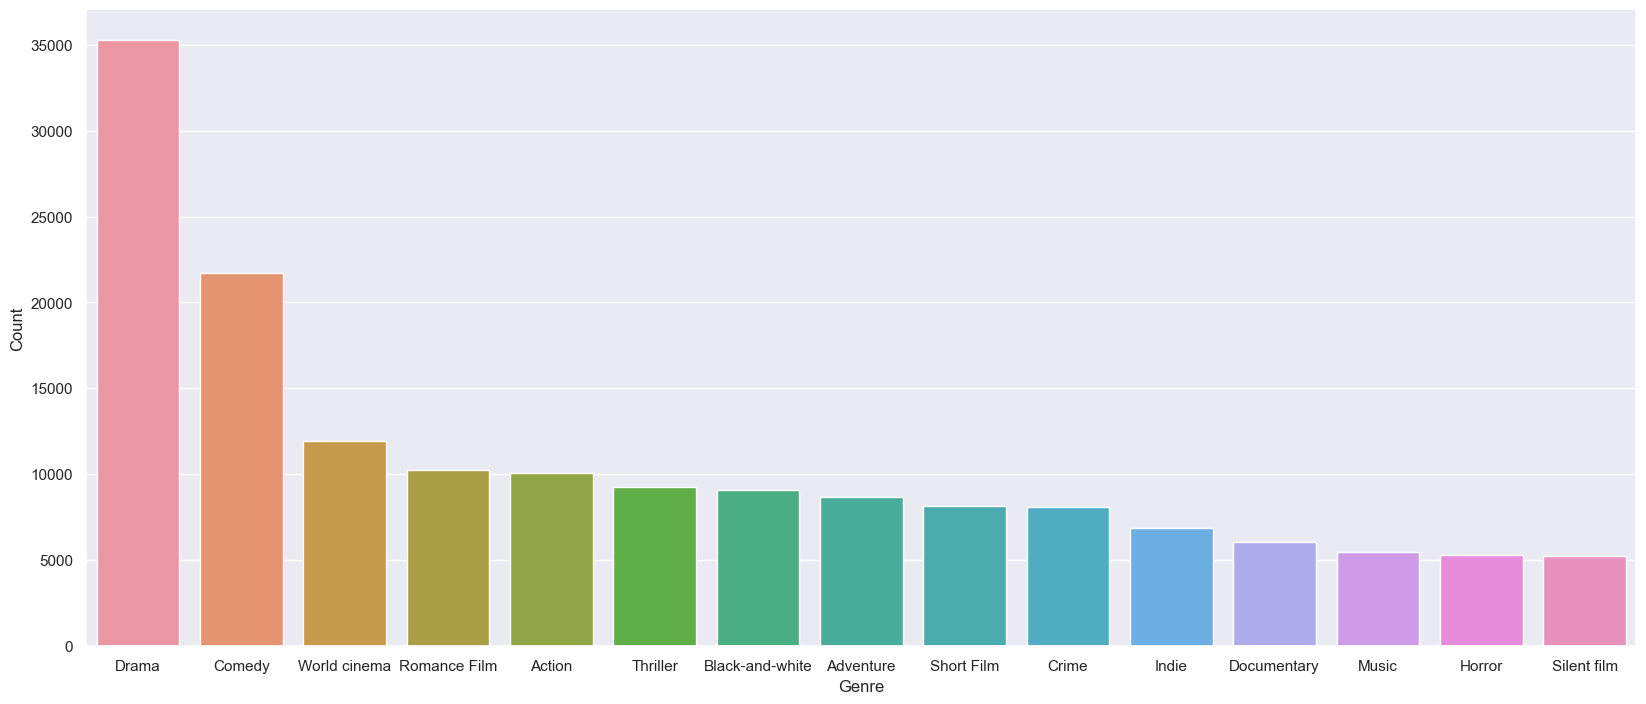

In [117]:
count = movies_and_genres_df.loc[:,"Absurdism":].apply(lambda x: x.value_counts()).iloc[1]

count_genres = pd.DataFrame(count.items(), columns=["Genre", "Count"])

sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x="Genre",y= "Count",  data=count_genres.sort_values(by="Count", ascending=False).head(15))